In [1]:
import pandas as pd

df=pd.read_csv("datasets/titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
df.drop(['Parents/Children Aboard','Name','Fare'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [3]:
df['Sex']=df['Sex'].map({
    'male':1,
    'female':0
})
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [4]:
X=df.drop(['Pclass'],axis=1)
y=df['Pclass']
print(X.head())
print(y.head())

   Survived  Sex   Age  Siblings/Spouses Aboard
0         0    1  22.0                        1
1         1    0  38.0                        1
2         1    0  26.0                        0
3         1    0  35.0                        1
4         0    1  35.0                        0
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(709, 4)   (178, 4)   (709,)   (178,)


In [6]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [7]:
y_pred=nb.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[3 3 3 1 3]
14     3
158    3
762    1
740    3
482    3
Name: Pclass, dtype: int64


In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,matthews_corrcoef

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average="weighted"))
print(matthews_corrcoef(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
print(cm)

0.6179775280898876
0.6032570214774604
0.2818948457490423
[[25  2 12]
 [ 9  2 15]
 [22  8 83]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.45      0.64      0.53        39
           2       0.17      0.08      0.11        26
           3       0.75      0.73      0.74       113

    accuracy                           0.62       178
   macro avg       0.46      0.48      0.46       178
weighted avg       0.60      0.62      0.60       178



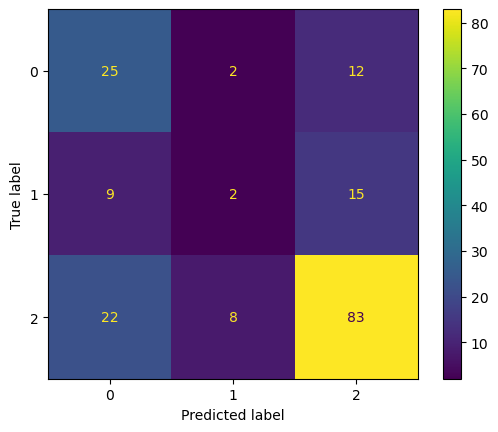

In [14]:
# %matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

graph=ConfusionMatrixDisplay(confusion_matrix=cm)
graph.plot()
